#          Réseaux de neurones: classification - Application Titanic

Vous disposez d'informations sur les passagers du RSS Titanic. Trois fichiers sont fournis :
- TrainTitanic.csv qui contient les données pour l'entraineement
- TestTitanic.csv qui contient les données pour l'évaluation des performances du modèle
- Gender_submission.csv qui contient les attributs de survie (labels) des individus de TestTitanic.csv

Ainsi dans TrainTitanic.csv, on a une colonne "survived" (1 si l'individu a survecu, 0 sinon), qui n'existe pas dans TestTitanic.csv ; cette information manquante est dans Gender_submission.csv

Les étapes classiques d'un projet de classification par machine learning par réseau de neurones sont: 
1. Chargement des données ; nettoyage des données ; transformation des features éventuellement (normalisation/standardisation/etc..)
2. Définition de l'architecture du réseau de neurones - Définition du modèle Keras
3. Choix des paramètres de l'apprentissage - Compilation du modèle Keras
4. Apprentissage 
5. Evaluation du modèle obtenu
6. Amélioration des performances du modèle
7. Exploitation du modèle pour faire des prédictions (pas d'intérêt dans cette application)
	
Il vous est proposé de commencer avec peu de features, d'optimiser le réseau de neurones correspondant, d'étudier l'influence de 2 ou 3 hyperparamères, puis ensuite d'augmenter le nombre de features. 

Vous chercherez à optimiser le réseau de neurones afin d'obtenir les meilleurs capacités prédicitves sur les individus du fichier de validation.

La capacité prédictive sera mesurée par  : 
- la matrice de confusion
- la précision, le recall, le f1 score.

Le critère comparatif des performances du modèle obtenu sera choisi comme le nombre d'individus mal classés.

# 1. Chargement des données & Transformations initiales 
Vous récupérez les fichiers de données du Titanic : 
- Données d'entrainement : TrainTitanic.csv
- Données de test : TestTitanic.csv + Gender_submission.csv (voir plus haut)

In [43]:
import pandas as pd #importation de la bibliothèque pandas
import numpy as np  #importation de la bibliothèque numpy

# Chargement des données des trois fichiers dans 3 dataframes : 
# df_app, df_test et df_target

# utilisation de pd.read_csv pour charger les fichiers dans les dataframes

df_app    = pd.read_csv('TrainTitanic.csv',sep=",", decimal=".",engine='python')
df_test   = pd.read_csv('TestTitanic.csv',sep=",", decimal=".",engine='python')
df_target = pd.read_csv('Gender_submission.csv',sep=",", decimal=".",engine='python')

In [44]:
# Affichage des premières lignes de df_app : 
df_app.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


A la vue du dataset d'entrainement (est-ce pareil dans le dataset de test ?), le genre des passagers (colonnes Sex) est codé avec male et female. On va transformer cela en créant deux colonnes correspondant aux genres avec un codage 0 ou 1 selon les cas : voir get_dummies 

In [45]:
X_sex=pd.get_dummies(df_app.Sex,prefix="Sex",prefix_sep="_")
df_app=pd.concat([df_app,X_sex], axis=1)
df_app.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [46]:
# FAIRE LA MEME TRANSFORMATION POUR LES DONNEES DE VALIDATION

X_sex2=pd.get_dummies(df_test.Sex,prefix="Sex",prefix_sep="_")
df_test=pd.concat([df_test,X_sex2], axis=1)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0


In [47]:
# AFFICHER LA TAILLE DES DEUX DATASETS

print(df_app.shape)
print(df_test.shape)

(891, 14)
(418, 13)


L'attribut de survie se trouve dans la colonne Survived de df_app (pour le set d'entrainement) et dans df_target (pour le set de test) codé sous la forme de 0 et 1. 
En classification avec un réseau de neurones, il est souvent employé un codage One-Hot.

SINON SANS CODAGE ONE-HOT, COMMENT POURRAIT-ON FAIRE ? 


In [48]:
from tensorflow.keras.utils import to_categorical
# codage One-Hot (voir to_categorical) 
target_app = to_categorical(df_app.Survived)
target_test= to_categorical(df_target.Survived)

# 2. Choix des inputs/outputs du modèle

In [49]:
# CHOISISSEZ LES ENTREES (ou features) DU MODELE : 
# X_train pour le set d'entrainement
# X_test  pour le set de validation

X_train = df_app.copy()
Survived = df_app.pop("Survived")
X_train = X_train.drop(["Survived", "Name", "Sex", "PassengerId", "Fare", "Age", "Cabin", "Embarked", "Ticket"], axis=1)
X_test = df_test.copy()
X_test = X_test.drop(["Name", "Sex", "PassengerId", "Fare", "Age", "Cabin", "Embarked", "Ticket"], axis=1)

# AFFICHEZ LES DIMENSIONS ET LES PREMIERES LIGNES DE X_train et X_test:
print(X_train.shape)
print(X_test.shape)
X_train.head()


(891, 5)
(418, 5)


,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1


# 3. Architecture du Réseau de Neurones

In [50]:
# import des fonctions keras nécessaires
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot

# EN UTILISANT LES INSTRUCTIONS DU CODE INITIATIONKERAS :
# Construction du modèle : 
# -1) initialisation : le modèle va consister en une succession de couches de neurones 
model = Sequential()

# -2) choix du nombre de neurones sur couche d'entrée : n_cols
# choix du nombre de neurones cachée sur première couche cachée: n_neurone_cache_1

n_rows, n_cols = X_train.shape
n_neurone_cache_1 = 8
model.add(Dense(n_neurone_cache_1,
                activation='relu',
                input_dim=n_cols))

# -3) ajout d'une couche de poids avec .add et Dense pour réseau complétement connecté: 
# - nombre de neurones cachés, 
# - type de fonction d'activation 
# - input_shape pour la couche d'entrée seulement
# remarque: pour les fonctions de transfert :  
# activation= 'relu' ou 'tanh' ou 'sigmoid' ou linear' ou 'softmax' etc...

model.add(Dense(8,activation='relu'))

# choix du nombre de neurones de sortie : n_neurone_sortie

model.add(Dense(2,activation='sigmoid'))

# ajout d'une couche supplémentaire  


# Résumé du modèle défini
model.summary()

# Vérifiez et confirmez le nombre de poids !!! 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 18        
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


# 4. Choix paramètres apprentissage + Compilation Réseau de Neurones 

In [51]:
# EN UTILISANT LES INSTRUCTIONS DU CODE NITIATIONKERAS :
# Compilation du réseau de neurones: 
# a minima choix de l'algo d'apprentissage, de la fonction loss, et de la métrique

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['mean_squared_error'])

# méthode d'optimisation: optimizer='sgd', ou 'adam' ou ... 
# fonction cout: loss='binary_crossentropy' ou 'categorical_crossentropy' ou 
# 'mean_squared_error' ou 'mean_absolute_error' etc...

In [52]:
to_categorical(df_target.Survived)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

# 5. Entrainement du modèle Réseau de Neurones

In [56]:
# EN UTILISANT LES INSTRUCTIONS DU CODE NITIATIONKERAS :
# Paramètres de l'entrainement : 
# - choix du nombre d'époques (epoch), 
# - de la taille du batch, 
# - de la proportion pour la validation (nombre décimal compris entre 0 et 1)
# - du mode bavard: verbose (0 ou 1 ...)
# - si les données sont mélangées à chaque époque (shuffle est True ou False)
history = model.fit(X_train,
           target_app,
           batch_size=32,
           epochs=15,
           verbose=2,
          validation_data=(X_test,target_test))


Epoch 1/15
28/28 - 0s - loss: 0.4661 - mean_squared_error: 0.1481 - val_loss: 0.2549 - val_mean_squared_error: 0.0574
Epoch 2/15
28/28 - 0s - loss: 0.4654 - mean_squared_error: 0.1479 - val_loss: 0.2549 - val_mean_squared_error: 0.0577
Epoch 3/15
28/28 - 0s - loss: 0.4641 - mean_squared_error: 0.1478 - val_loss: 0.2495 - val_mean_squared_error: 0.0565
Epoch 4/15
28/28 - 0s - loss: 0.4633 - mean_squared_error: 0.1472 - val_loss: 0.2522 - val_mean_squared_error: 0.0579
Epoch 5/15
28/28 - 0s - loss: 0.4629 - mean_squared_error: 0.1471 - val_loss: 0.2472 - val_mean_squared_error: 0.0554
Epoch 6/15
28/28 - 0s - loss: 0.4617 - mean_squared_error: 0.1469 - val_loss: 0.2507 - val_mean_squared_error: 0.0576
Epoch 7/15
28/28 - 0s - loss: 0.4607 - mean_squared_error: 0.1463 - val_loss: 0.2526 - val_mean_squared_error: 0.0583
Epoch 8/15
28/28 - 0s - loss: 0.4609 - mean_squared_error: 0.1461 - val_loss: 0.2487 - val_mean_squared_error: 0.0576
Epoch 9/15
28/28 - 0s - loss: 0.4601 - mean_squared_erro

In [42]:
target_app.shape


(891, 2)

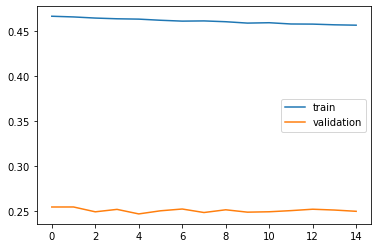

In [57]:
# Tracé de l'évolution de la fonction loss au cours de l'apprentissage
# Par exemple, si vous avez créé : history = modelRN.fit((etc....) alors:

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

# 6. Validation et visualisation des performances du modèle

In [ ]:
# Les predictions sont faites sur le set de validation finale (X_test)
# EXPLIQUEZ CE QUI EST FAIT ICI :
predictions_test = modelRN.predict(X_test)
y_test=predictions_test[:,0]<predictions_test[:,1]
y_test=y_test.astype(int)

In [ ]:
# Evaluation des performances avec : 
# - confusion_matrix
# - classification_report

from sklearn.metrics import classification_report , confusion_matrix

# Matrice de confusion
target_soluce = df_target.Survived
print(confusion_matrix(target_soluce, y_test))

In [ ]:
# Rapoort de classification

# support : nombre d'individus dans chaque classe
# precision : nombre d'individus bien classés / nombre total d'individus attribués à la classe
# recall : nombre d'individus bien classés / nombre total d'individus de la classe
# f1-score : moyenne harmonique entre precision et recall
print(classification_report(target_soluce, y_test))

# 7. OPTIONNEL

In [ ]:
# A FAIRE UNE FOIS QUE VOUS AVEZ TROUVE VOTRE MEILLEUR MODELE

# OPTION 1 : stadardisation des entrées
# chargement de la fonction StandardScaler de la bibliothèque sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()

# Détermination des paramètres de standardisation à partir du set d'entrainement (X_train)
scaler.fit(X_train)

# Applicattion de la standardisation aux deux sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TESTEZ MAINTENANT SI LA STANDARDISATION A UN EFFET POSITIF SUR L'APPRENTISSAGE

In [ ]:
# OPTION 2 : EARLY STOPPING
# ajout d'une option d'arrêt prématuré de l'entrainement pour éviter le sur-apprentissage. Par exemple:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# ==> si lors de l'apprentissage, on passe par un minimum de la fonction cout des données de validation 
# et qu'il n'y a pas d'amélioration pendant 5 époques alors ARRET 

# history = modelRN.fit(...
#           etc...
#           callbacks=[es]) 

# TESTEZ MAINTENANT L'EFFET DU EARLY STOPPING


In [ ]:
# OPTION 3 : SAUVEGARDE DES POIDS/PARAMETRES DONNANT LES MEILLEURS RESULTATS PENDANT L'ENTRAINEMENT 
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# si options utilisées il faudra ajouter dans la fonction fit : callbacks=[es,mc]

# history = modelRN.fit(...
#           etc...
#           callbacks=[mc]) 

# Pour récupérer les meilleurs résultats ainsi sauvés : 
best_modelRN = load_model('best_model.h5')
# Calcul des prédictions avec le meilleur modèle 
best_predictions_test = best_modelRN.predict(X_test)
best_y_test=best_predictions_test[:,0]<best_predictions_test[:,1]
best_y_test=best_y_test.astype(int)

print(confusion_matrix(target_soluce, best_y_test))